In [2]:
import os
import pandas as pd
import matplotlib
import numpy as np
from matplotlib import pylab as plt

# Create a directory for saving figures
figures_dir = 'figures'
os.makedirs(figures_dir, exist_ok=True)

# Load the data
df = pd.read_csv('/Users/matias/Documents/Brown University/Data Science 1030/DATA 1030 FinalProject/data/Debernardi et al 2020 data.csv')

# EDA

# How many rows and columns do we have in the dataframe?
rows, columns = df.shape
print("Number of rows: ", rows)
print("Number of features: ", columns)

# Map diagnosis to binary: 0 = no cancer, 1 = cancer
df['binary_diagnosis'] = df['diagnosis'].apply(lambda x: 1 if x in [2,3] else 0)

# Visualize the new binary target variable
binary_counts = df['binary_diagnosis'].value_counts()

# Ensure the correct resolution
plt.rcParams['figure.dpi'] = 300

# Plot the bar chart for cancer vs. no cancer
plt.figure(figsize=(6,4))
binary_counts.plot(kind='bar', color='skyblue')

plt.xlabel('Cancer Status')
plt.ylabel('Counts')
plt.xticks(ticks=[0, 1], labels=['No Cancer', 'Cancer'], rotation=0)
plt.title('Number of Individuals by Cancer Status')

# Save the plot
plt.savefig(os.path.join(figures_dir, 'cancer_status_bar_chart.png'))
plt.close()

# Set presentation style
plt.style.use('ggplot')  

# Set up the figure and subplots
plt.figure(figsize=(20, 5))

# Boxplot for 'Age' by binary diagnosis
plt.subplot(1, 4, 1)
plt.boxplot([df[df['binary_diagnosis'] == 0]['age'], df[df['binary_diagnosis'] == 1]['age']])
plt.title('Age Distribution Across Cancer Status', fontsize=14, fontweight='bold')
plt.xlabel('Cancer Status', fontsize=12, fontweight='bold')
plt.ylabel('Age (Years)', fontsize=12, fontweight='bold')
plt.xticks(ticks=[1, 2], labels=['No Cancer', 'Cancer'], fontsize=10)

# Boxplot for 'LYVE1' by binary diagnosis
plt.subplot(1, 4, 2)
plt.boxplot([df[df['binary_diagnosis'] == 0]['LYVE1'].dropna(), df[df['binary_diagnosis'] == 1]['LYVE1'].dropna()])
plt.title('LYVE1 Levels Across Cancer Status', fontsize=14, fontweight='bold')
plt.xlabel('Cancer Status', fontsize=12, fontweight='bold')
plt.ylabel('LYVE1 (ng/ml)', fontsize=12, fontweight='bold')
plt.xticks(ticks=[1, 2], labels=['No Cancer', 'Cancer'], fontsize=10)

# Boxplot for 'Creatinine' by binary diagnosis
plt.subplot(1, 4, 3)
plt.boxplot([df[df['binary_diagnosis'] == 0]['creatinine'].dropna(), df[df['binary_diagnosis'] == 1]['creatinine'].dropna()])
plt.title('Creatinine Levels Across Cancer Status', fontsize=14, fontweight='bold')
plt.xlabel('Cancer Status', fontsize=12, fontweight='bold')
plt.ylabel('Creatinine (ng/ml)', fontsize=12, fontweight='bold')
plt.xticks(ticks=[1, 2], labels=['No Cancer', 'Cancer'], fontsize=10)

# Boxplot for 'REG1B' by binary diagnosis
plt.subplot(1, 4, 4)
plt.boxplot([df[df['binary_diagnosis'] == 0]['REG1B'].dropna(), df[df['binary_diagnosis'] == 1]['REG1B'].dropna()])
plt.title('REG1B Levels Across Cancer Status', fontsize=14, fontweight='bold')
plt.xlabel('Cancer Status', fontsize=12, fontweight='bold')
plt.ylabel('REG1B (ng/ml)', fontsize=12, fontweight='bold')
plt.xticks(ticks=[1, 2], labels=['No Cancer', 'Cancer'], fontsize=10)

# Adjust layout and save the plot
plt.tight_layout()
plt.savefig(os.path.join(figures_dir, 'boxplots_cancer_status.png'))
plt.close()

# Create a crosstab to count the occurrences of cancer status for each sex
sex_cancer_counts = pd.crosstab(df['sex'], df['binary_diagnosis'])

# Plot a stacked bar chart
sex_cancer_counts.plot(kind='bar', stacked=True, figsize=(8, 6), color=['skyblue', 'orange'])

plt.title('Distribution of Cancer Status by Sex', fontsize=14, fontweight='bold')
plt.xlabel('Sex', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')
plt.xticks(rotation=0, fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')

plt.legend(title='Cancer Status', title_fontsize='12', fontsize=10, loc='upper right')

# Save the plot
plt.tight_layout()
plt.savefig(os.path.join(figures_dir, 'sex_cancer_status.png'))
plt.close()

# Create a crosstab to count the occurrences of cancer status for each cohort
cohort_cancer_counts = pd.crosstab(df['patient_cohort'], df['binary_diagnosis'])

# Plot a stacked bar chart
cohort_cancer_counts.plot(kind='bar', stacked=True, figsize=(8, 6), color=['skyblue', 'orange'])

plt.title('Distribution of Cancer Status by Patient Cohort', fontsize=14, fontweight='bold')
plt.xlabel('Patient Cohort', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')
plt.xticks(rotation=0, fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')

plt.legend(title='Cancer Status', title_fontsize='12', fontsize=10, loc='upper right')

# Save the plot
plt.tight_layout()
plt.savefig(os.path.join(figures_dir, 'cohort_cancer_status.png'))
plt.close()


Number of rows:  590
Number of features:  14


In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Ensure the figures directory exists
figures_dir = os.path.join(os.getcwd(), "figures")
os.makedirs(figures_dir, exist_ok=True)

# Check for missing values and calculate the fraction of missing values
missing_values = df.isnull().sum()  # Count of missing values for each column
total_rows = df.shape[0]  # Total number of rows

# Calculate fraction of missing values
missing_fraction = missing_values / total_rows

# Create a DataFrame for easier viewing
missing_info = pd.DataFrame({
    'Missing Values': missing_values,
    'Fraction Missing': missing_fraction
})

# Filter to show only columns with missing values
missing_info = missing_info[missing_info['Missing Values'] > 0]

print("Columns with missing values and their fractions:")
print(missing_info)

# Ensure the correct resolution
plt.rcParams['figure.dpi'] = 300

# Plotting the fraction of missing values
plt.figure(figsize=(10, 6))
missing_info['Fraction Missing'].sort_values().plot(kind='barh', color='skyblue')
plt.title('Fraction of Missing Values by Column')
plt.xlabel('Fraction Missing')
plt.ylabel('Columns')
plt.axvline(0.5, color='red', linestyle='--', label='50% Missing Threshold')
plt.legend()
plt.grid(axis='x')

# Save the figure
plt.tight_layout()
plt.savefig(os.path.join(figures_dir, 'fraction_missing_values.png'))
plt.close()

# Plotting the number of missing values
plt.figure(figsize=(10, 6))
missing_info['Missing Values'].sort_values().plot(kind='barh', color='salmon')
plt.title('Number of Missing Values by Column')
plt.xlabel('Number of Missing Values')
plt.ylabel('Columns')
plt.axvline(0, color='red', linestyle='--', label='No Missing Values')
plt.legend()
plt.grid(axis='x')

# Save the figure
plt.tight_layout()
plt.savefig(os.path.join(figures_dir, 'number_missing_values.png'))
plt.close()

Columns with missing values and their fractions:
                         Missing Values  Fraction Missing
stage                               391          0.662712
benign_sample_diagnosis             382          0.647458
plasma_CA19_9                       240          0.406780
REG1A                               284          0.481356


In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import fbeta_score
import matplotlib.pyplot as plt
from xgboost import XGBClassifier

# Load Dataframe
df = pd.read_csv('/Users/matias/Documents/Brown University/Data Science 1030/DATA 1030 FinalProject/data/Debernardi et al 2020 data.csv')

# Drop unnecessary columns and prepare target variable
X = df.drop(columns=['diagnosis', 'stage', 'benign_sample_diagnosis', 'patient_cohort', 'sample_id', 'sample_origin'], axis=1)
y = df['diagnosis'].map({1: 0, 2: 0, 3: 1})  # Binary classification

# Define categorical and continuous features
categorical_features = ['sex']
continuous_features = ['plasma_CA19_9', 'creatinine', 'LYVE1', 'REG1B', 'TFF1', 'REG1A', 'age']

# Create a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_features),
        ('num', Pipeline(steps=[
            ('imputer', IterativeImputer(random_state=20)),
            ('scaler', StandardScaler())
        ]), continuous_features)
    ]
)

# Define models and their parameter grids
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=30),
    'Random Forest': RandomForestClassifier(random_state=30),
    'SVM': SVC(probability=True, random_state=30),
    'KNN': KNeighborsClassifier(),
    'XGBoost': XGBClassifier(eval_metric='logloss', random_state=30)
}

param_grids = {
    'Logistic Regression': {
        'model__C': [0.01, 0.1, 1, 10, 100],
        'model__solver': ['liblinear', 'lbfgs']
    },
    'Random Forest': {
        'model__n_estimators': [100],
        'model__max_depth': [2, 5, 10, 20, 30, 50, 100],
        'model__min_samples_split': [2, 5, 7, 10, 15, 30]
    },
    'SVM': {
        'model__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
        'model__kernel': ['linear', 'rbf'],
        'model__gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
    },
    'KNN': {
        'model__n_neighbors': [3, 5, 10, 15, 30, 100],
        'model__weights': ['uniform', 'distance']
    },
    'XGBoost': {
        'model__n_estimators': [100],
        'model__max_depth': [1, 2, 3, 5, 7, 9],
        'model__learning_rate': [0.01, 0.1, 0.2, 0.4, 0.6],
        'model__subsample': [0.2, 0.4, 0.5, 0.8, 1.0]
    }
}

# Initialize dictionaries to store test scores, baseline scores, and best parameters
test_scores = {name: [] for name in models.keys()}
baseline_scores = {name: [] for name in models.keys()}
best_params = {name: None for name in models.keys()}  # Add this line

# Iterate over 5 random states for model training and evaluation
for i in range(5):
    random_state = 30 + i
    print(f"Running iteration {i+1} with random_state={random_state}...")

    # Split data with different random states
    X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

    for name, model in models.items():
        print(f"Tuning hyperparameters for {name}...")

        # Create a pipeline and perform grid search
        pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
        grid_search = GridSearchCV(
            estimator=pipeline,
            param_grid=param_grids[name],
            scoring='f1_macro',
            cv=5,  # Use KFold with 5 splits
            n_jobs=-1,
            verbose=1,
            return_train_score=False
        )
        grid_search.fit(X_train_val, y_train_val)

        # Save the best parameters for the model
        best_params[name] = grid_search.best_params_  # Add this line

        # Get best model and calculate test score
        best_model = grid_search.best_estimator_
        y_test_pred = best_model.predict(X_test)
        test_score = fbeta_score(y_test, y_test_pred, beta=1.0)
        test_scores[name].append(test_score)
        print(f"{name}: Test F1 Score: {test_score:.4f}")

        # Calculate baseline F1 score for this model
        baseline_prediction = 1  # Positive class
        baseline_y_pred = np.full_like(y_test, fill_value=baseline_prediction, dtype=int)
        baseline_f1 = fbeta_score(y_test, baseline_y_pred, beta=1.0)
        baseline_scores[name].append(baseline_f1)

# Compute average and standard deviation for test and baseline scores
avg_test_scores = {name: np.mean(scores) for name, scores in test_scores.items()}
std_test_scores = {name: np.std(scores) for name, scores in test_scores.items()}
avg_baseline_scores = {name: np.mean(scores) for name, scores in baseline_scores.items()}
std_baseline_scores = {name: np.std(scores) for name, scores in baseline_scores.items()}


# Ensure the figures directory exists
figures_dir = os.path.join(os.getcwd(), "figures")
os.makedirs(figures_dir, exist_ok=True)

# Visualize using a bar graph comparing baseline F1 scores and model scores
plt.figure(figsize=(12, 8))

# Ensure the right resolution
plt.rcParams['figure.dpi'] = 300

# Plot model scores with error bars
bar_labels = list(avg_test_scores.keys())
bar_heights = [avg_test_scores[name] for name in bar_labels]
bar_errors = [std_test_scores[name] for name in bar_labels]

bars = plt.bar(bar_labels, bar_heights, yerr=bar_errors, capsize=5, color='lightgreen', alpha=0.7, label='Model F1 Scores')

# Plot baseline scores with error bars
baseline_heights = [avg_baseline_scores[name] for name in bar_labels]
baseline_errors = [std_baseline_scores[name] for name in bar_labels]

plt.errorbar(bar_labels, baseline_heights, yerr=baseline_errors, fmt='o', color='red', label='Baseline F1 Scores')

# Add text annotations for scores and standard deviations
for i, (model_score, baseline_score, model_std, baseline_std) in enumerate(zip(bar_heights, baseline_heights, bar_errors, baseline_errors)):
    plt.text(i, model_score + 0.09, f'{model_score:.2f} ± {model_std:.2f}', ha='center', color='green')
    plt.text(i, baseline_score - 0.09, f'{baseline_score:.2f} ± {baseline_std:.2f}', ha='center', color='red')

# Customize plot
plt.ylabel('F1 Macro Score')
plt.xlabel('Model')
plt.title('Comparison of Model F1 Scores with Baseline F1 Scores')
plt.legend()
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.tight_layout()

# Save the figure
plt.savefig(os.path.join(figures_dir, 'comparison_f1_scores.png'))
plt.close()



Running iteration 1 with random_state=30...
Tuning hyperparameters for Logistic Regression...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Logistic Regression: Test F1 Score: 0.7458
Tuning hyperparameters for Random Forest...
Fitting 5 folds for each of 42 candidates, totalling 210 fits
Random Forest: Test F1 Score: 0.7419
Tuning hyperparameters for SVM...
Fitting 5 folds for each of 112 candidates, totalling 560 fits
SVM: Test F1 Score: 0.7458
Tuning hyperparameters for KNN...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
KNN: Test F1 Score: 0.7541
Tuning hyperparameters for XGBoost...
Fitting 5 folds for each of 150 candidates, totalling 750 fits
XGBoost: Test F1 Score: 0.8197
Running iteration 2 with random_state=31...
Tuning hyperparameters for Logistic Regression...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Logistic Regression: Test F1 Score: 0.6792
Tuning hyperparameters for Random Forest...
Fitting 5 folds for each of 42 candidat

In [7]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import os

# Ensure the figures directory exists
figures_dir = os.path.join(os.getcwd(), "figures")
os.makedirs(figures_dir, exist_ok=True)

# Ensure the right resolution
plt.rcParams['figure.dpi'] = 300

# Create confusion matrices for each model
for name, model in models.items():
    # Create a pipeline for the current model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    
    # Set the best parameters for the current model
    pipeline.set_params(**best_params[name])
    
    # Fit the model on the training/validation set
    pipeline.fit(X_train_val, y_train_val)
    
    # Predict on the test set
    y_test_pred = pipeline.predict(X_test)
    
    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_test_pred)
    
    # Display and save confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Control/Benign", "PDAC"])
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix for {name}')
    
    # Save the figure
    plt.savefig(os.path.join(figures_dir, f'confusion_matrix_{name}.png'))
    plt.close()


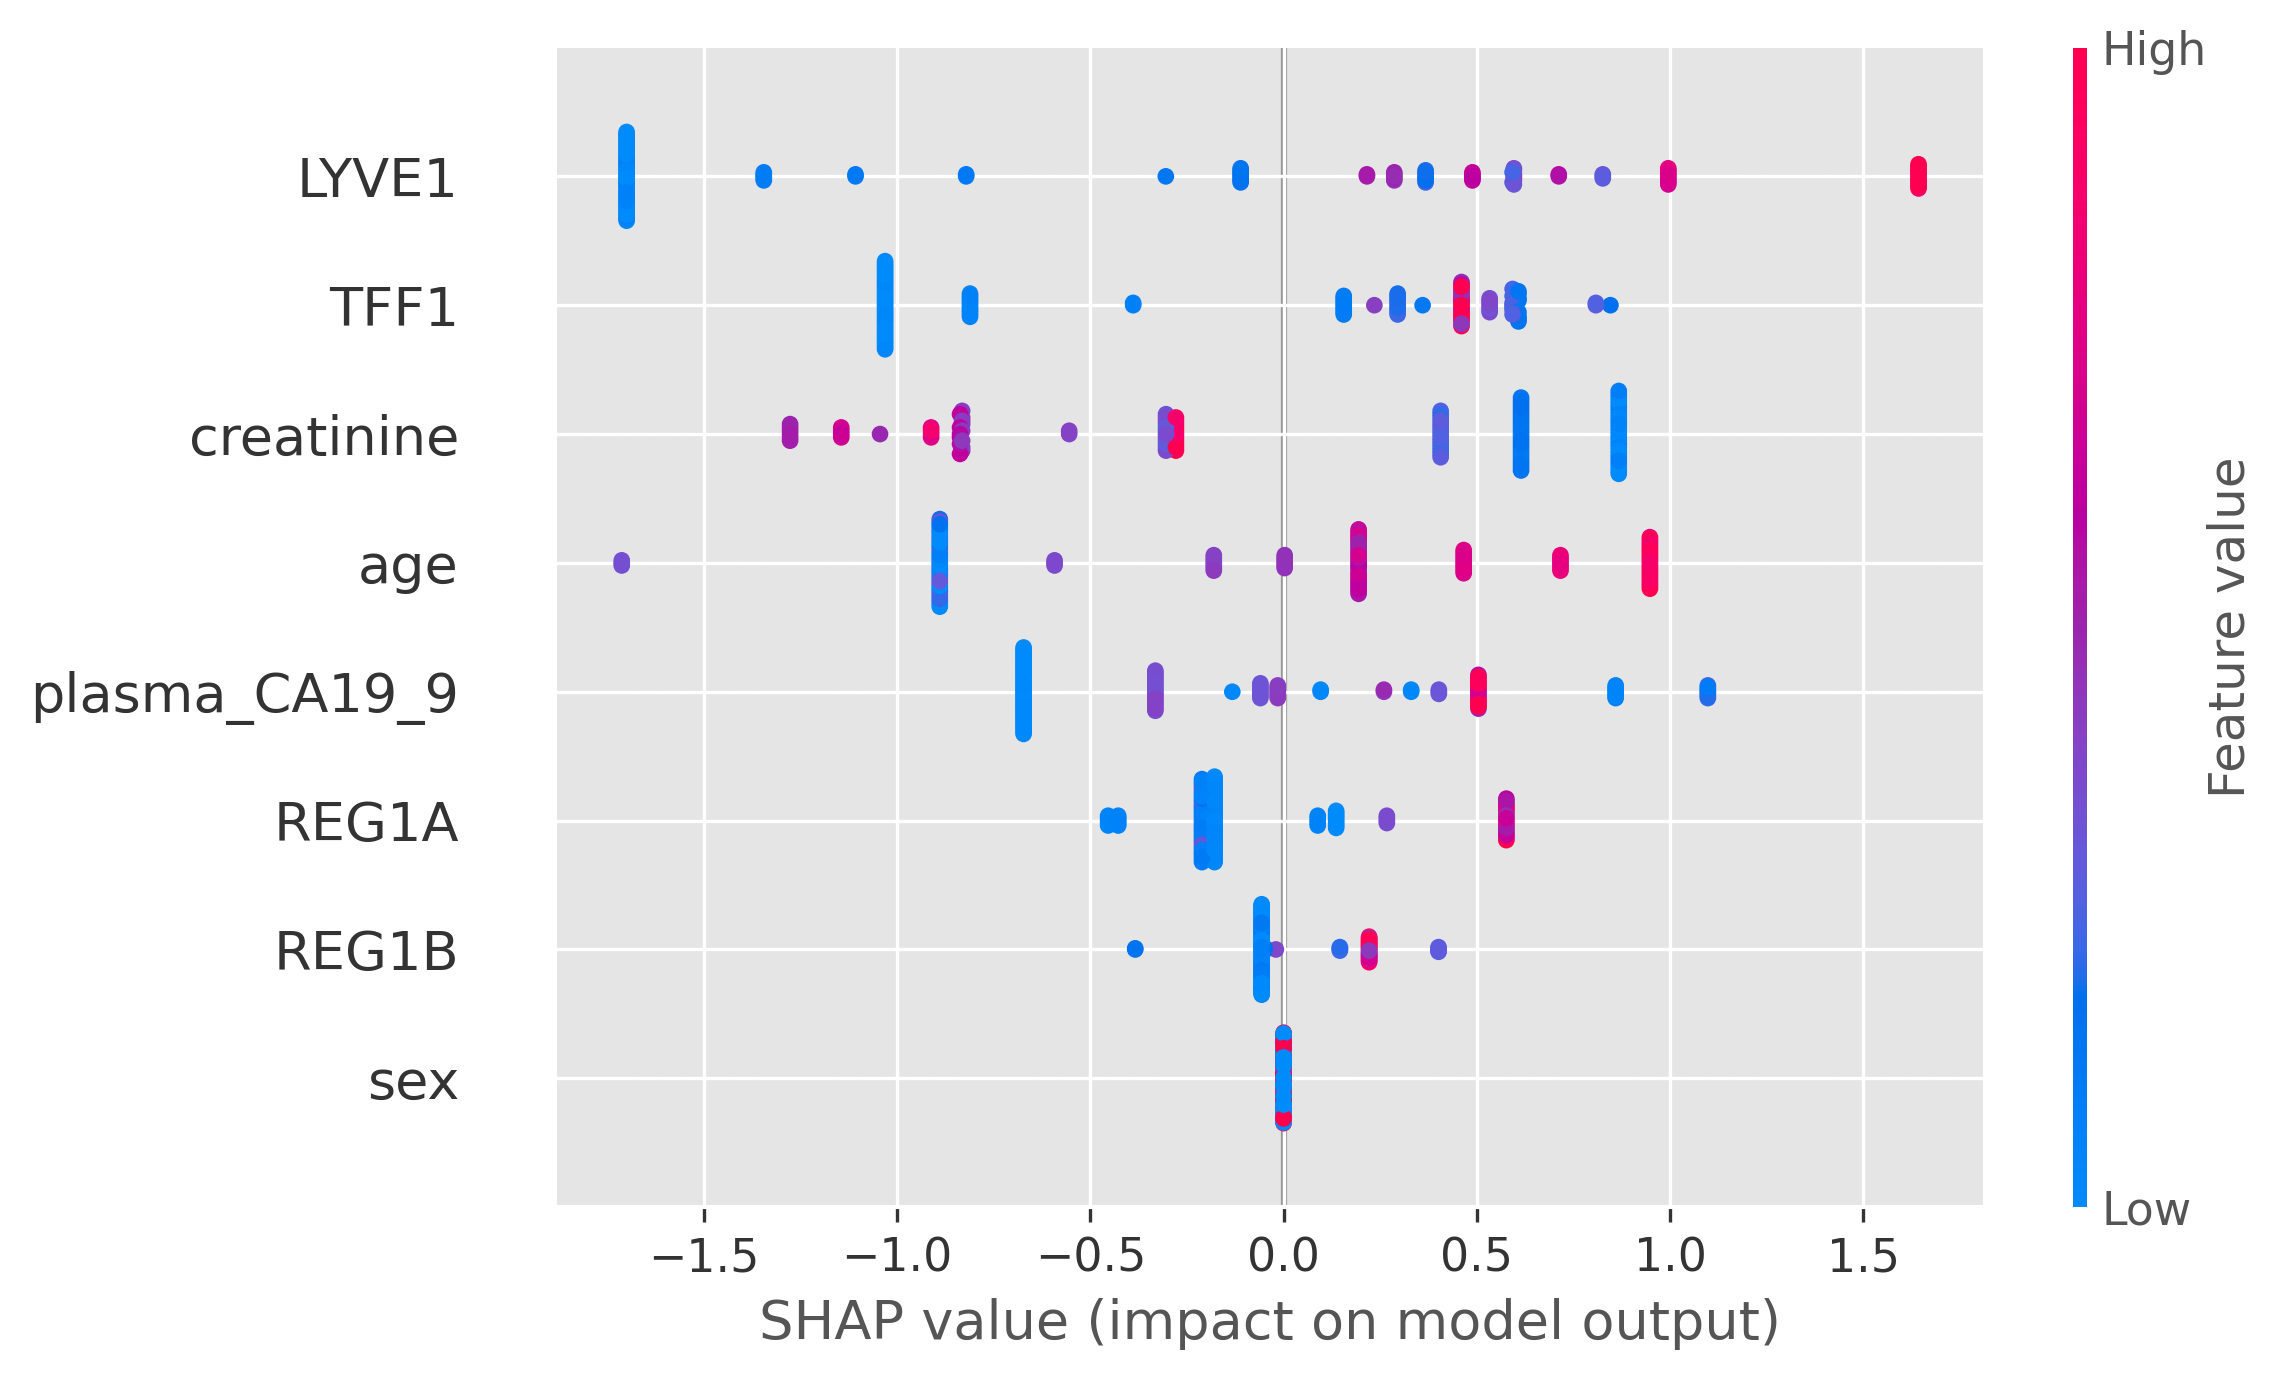

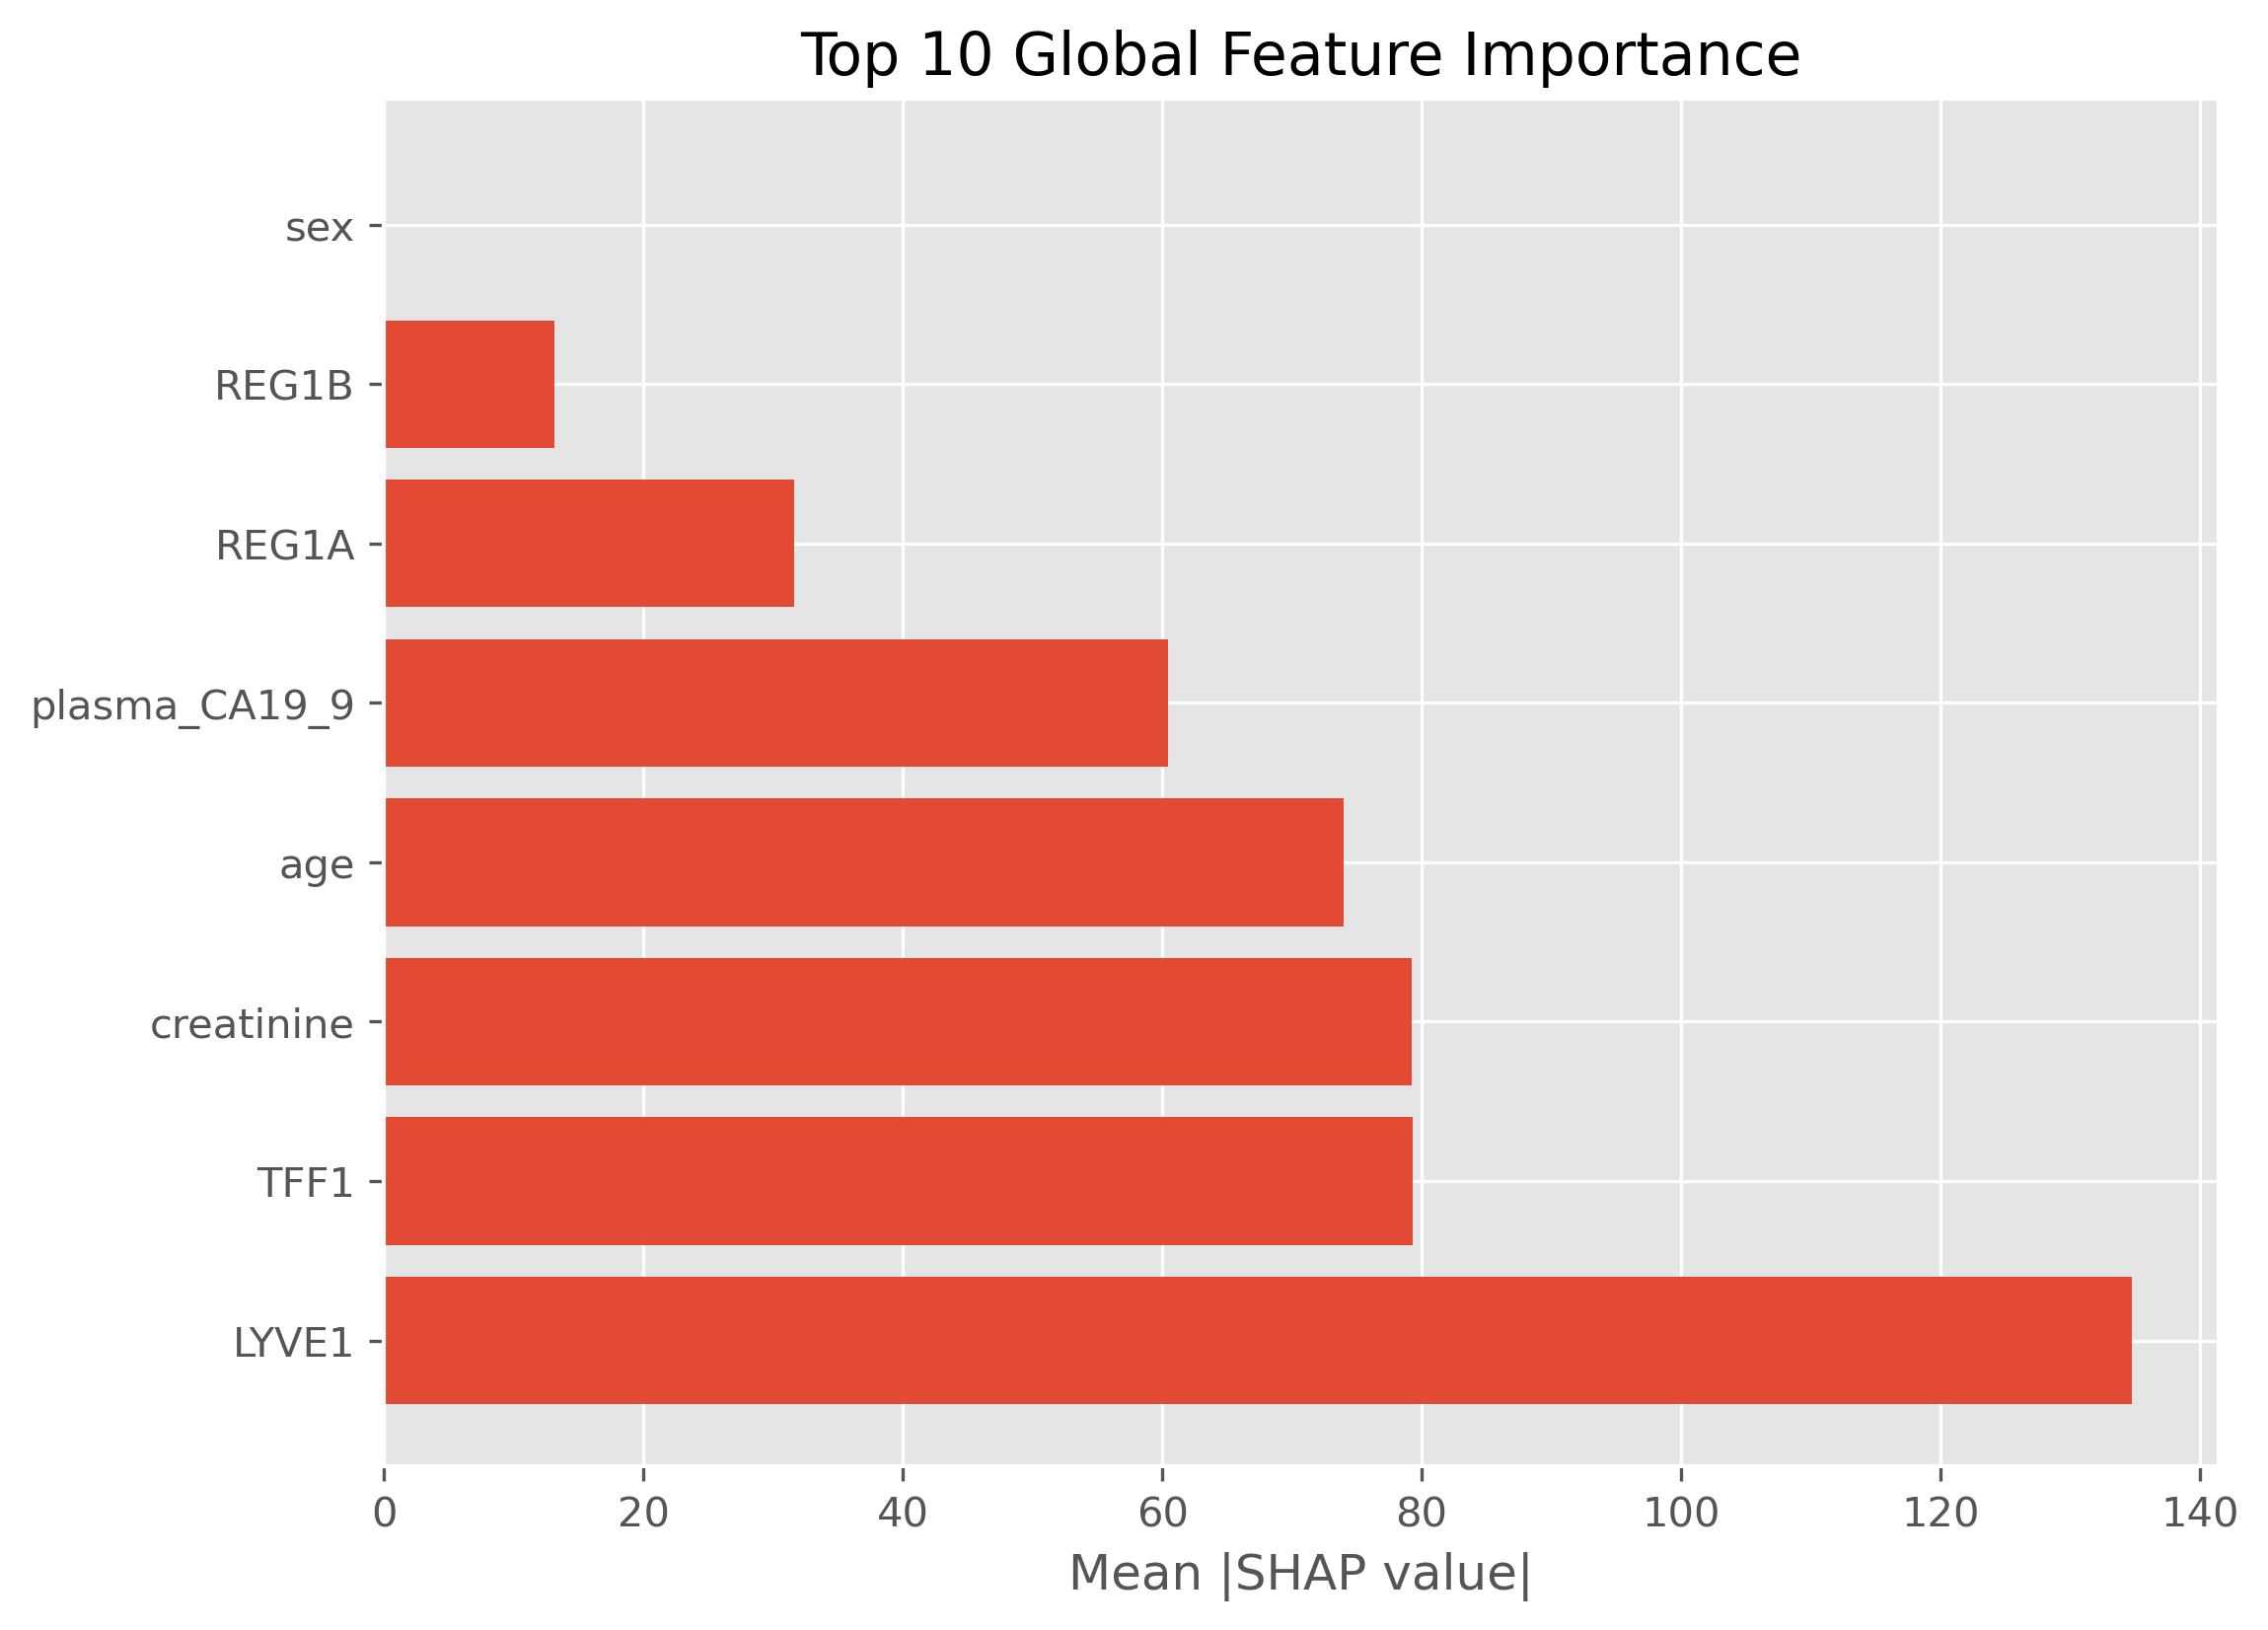

(118, 8)
[ 0.         -0.3319147  -1.2771302  -0.11115091 -0.05674031  0.15556544
 -0.17858858  0.19408214]


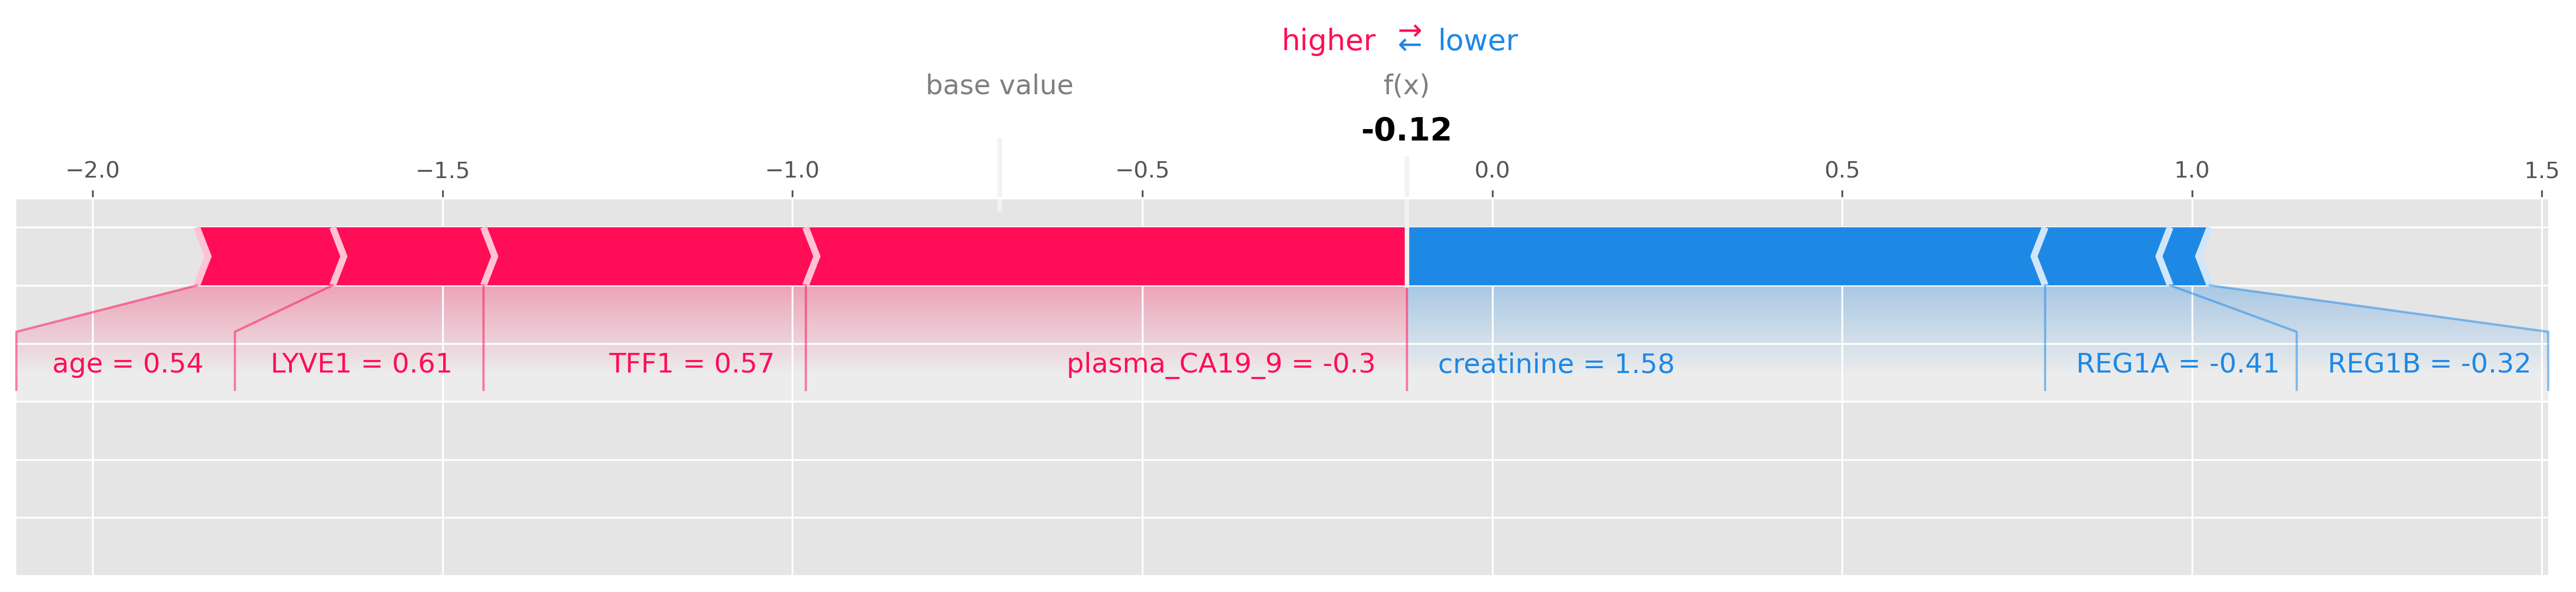

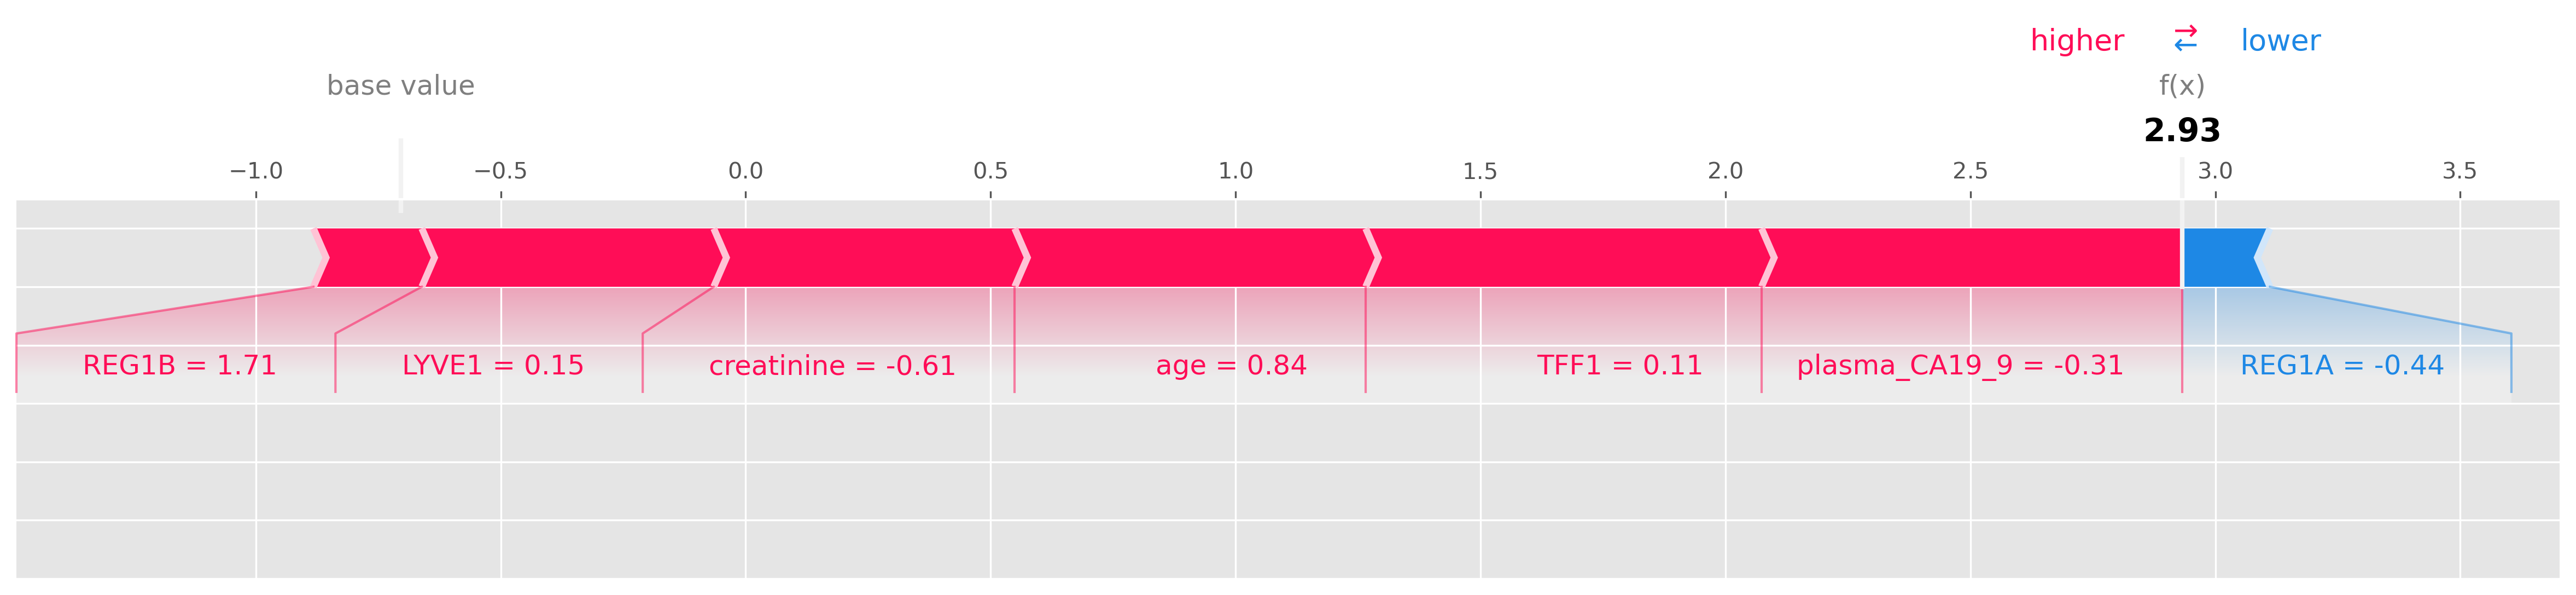

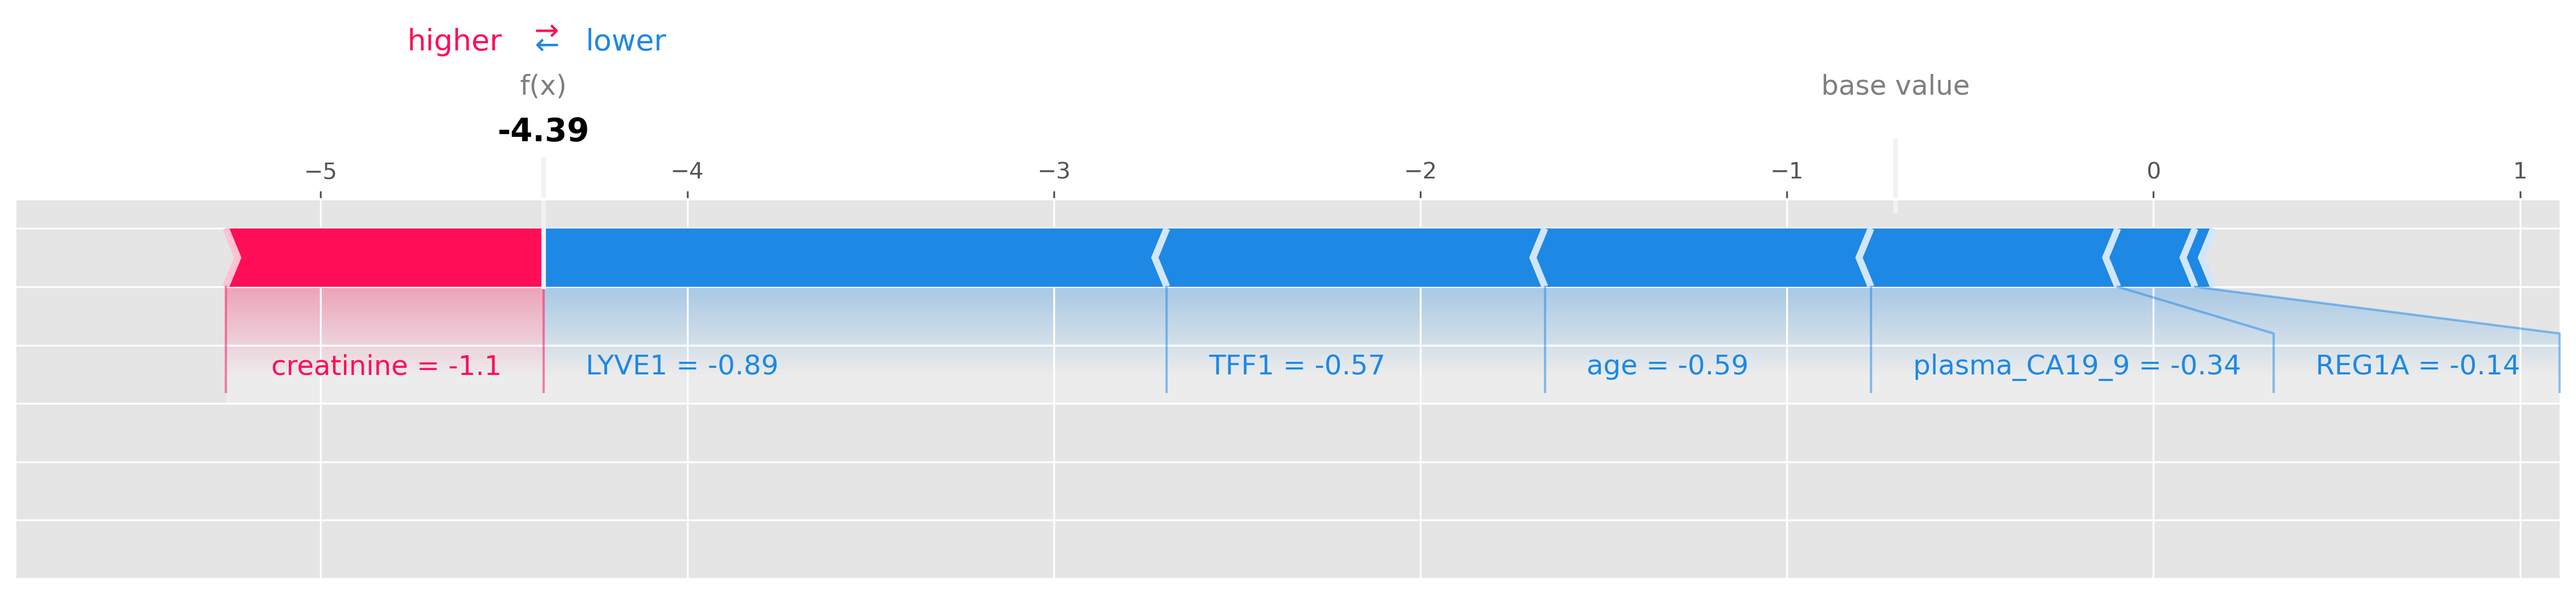

In [191]:
import shap
import matplotlib.pyplot as plt

# Ensure the right resolution
plt.rcParams['figure.dpi'] = 300

# Get the best XGBoost model after grid search
best_xgb_model = grid_search.best_estimator_.named_steps['model']

# Create the SHAP explainer for the XGBoost model
explainer = shap.TreeExplainer(best_xgb_model)

# Transform the data (apply preprocessing pipeline to test data)
X_test_transformed = grid_search.best_estimator_.named_steps['preprocessor'].transform(X_test)

# Compute SHAP values for the first 1000 samples of the test set
shap_values = explainer.shap_values(X_test_transformed)

# Global feature importance plot
shap.summary_plot(shap_values, X_test_transformed[:1000], feature_names=categorical_features + continuous_features)

# Calculate global feature importance (mean absolute SHAP values)
shap_summary = np.sum(np.abs(shap_values), axis=0)

# Sort the feature importance
indices = np.argsort(shap_summary)[::-1]

# Plot the top 10 features based on global importance
plt.figure(figsize=(8, 6))
plt.barh(np.array(categorical_features + continuous_features)[indices[:10]], shap_summary[indices[:10]])
plt.xlabel('Mean |SHAP value|')
plt.title('Top 10 Global Feature Importance')
plt.show()

print(shap_values.shape)  # For quick inspection of the dimensions
print(shap_values[0])  # Check the first instance to see its structure


shap.initjs()  # Required for interactive plots
for i in range(1,102,50):
    # Round the feature values
    rounded_features = np.round(X_test_transformed[i], 2)
    # 
    shap.force_plot(explainer.expected_value, shap_values[i], rounded_features, feature_names=categorical_features + continuous_features,matplotlib=True)






Tuning hyperparameters for Logistic Regression...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Logistic Regression: Best Parameters: {'model__C': 1, 'model__solver': 'liblinear'}
Logistic Regression: Best ROC AUC: 0.8834
Tuning hyperparameters for Random Forest...
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Random Forest: Best Parameters: {'model__max_depth': None, 'model__min_samples_split': 10, 'model__n_estimators': 100}
Random Forest: Best ROC AUC: 0.9157
Tuning hyperparameters for SVM...
Fitting 5 folds for each of 112 candidates, totalling 560 fits
SVM: Best Parameters: {'model__C': 1, 'model__gamma': 0.1, 'model__kernel': 'rbf'}
SVM: Best ROC AUC: 0.8853
Tuning hyperparameters for KNN...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
KNN: Best Parameters: {'model__n_neighbors': 30, 'model__weights': 'distance'}
KNN: Best ROC AUC: 0.8925
Tuning hyperparameters for XGBoost...
Fitting 5 folds for each of 60 candidates, totalling 300 f

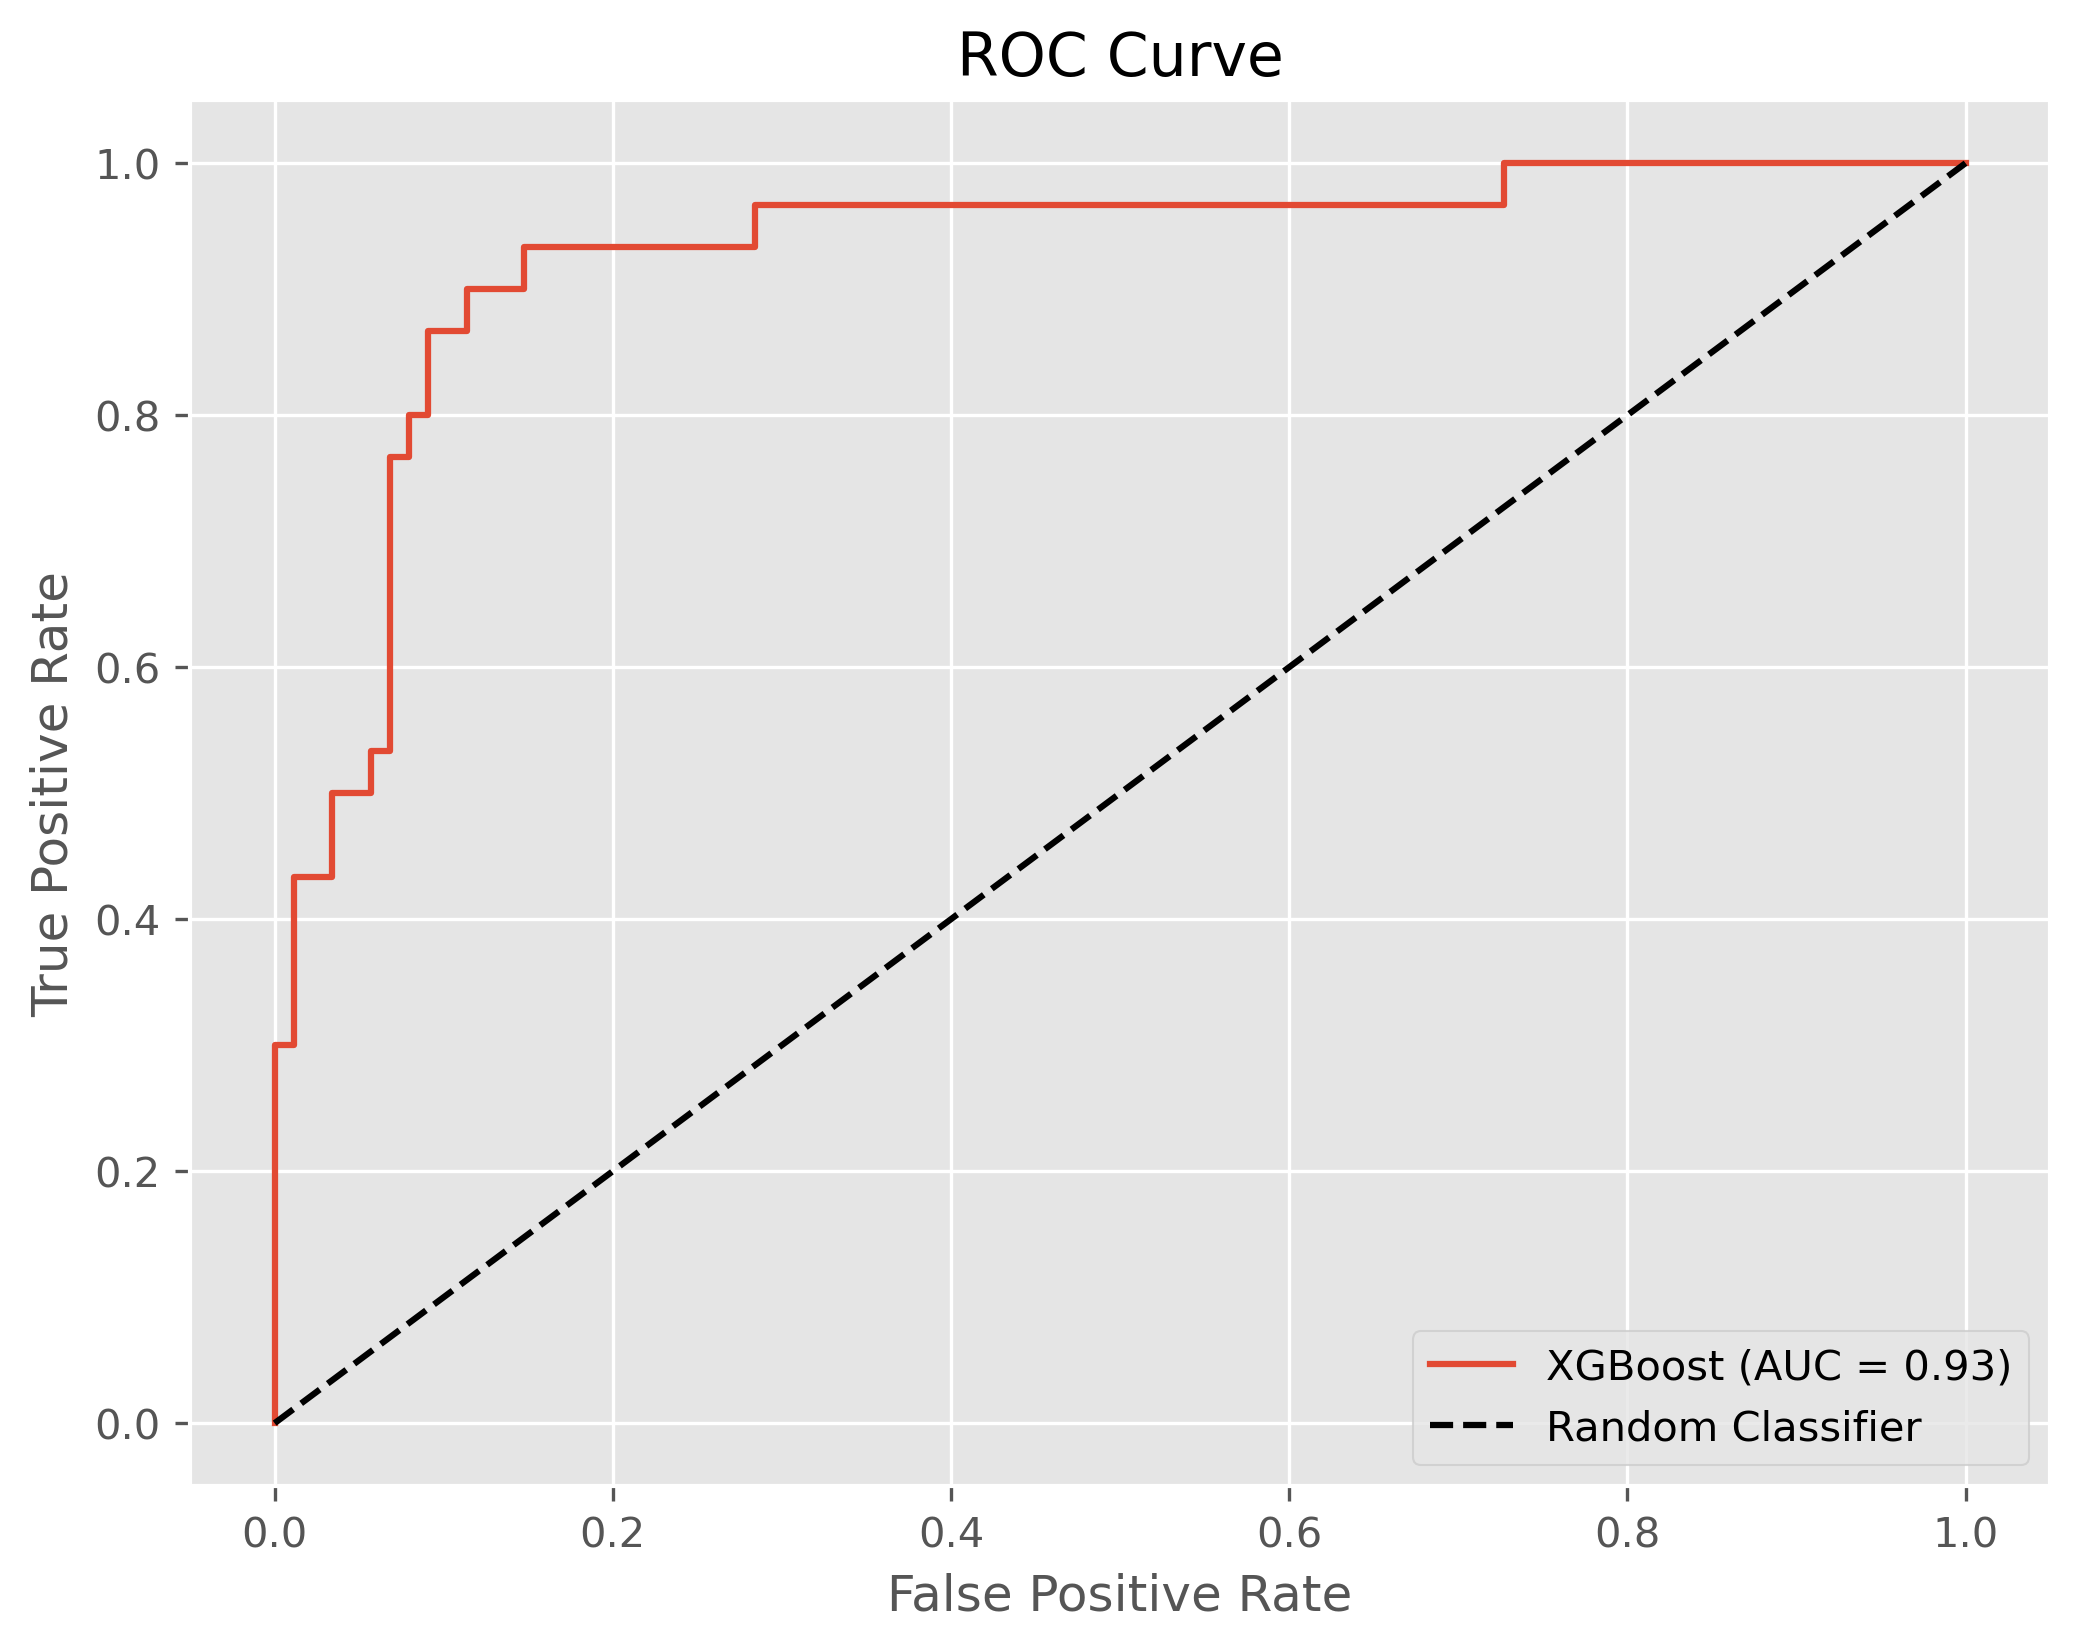

In [159]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, roc_curve, auc, classification_report
import matplotlib.pyplot as plt
from xgboost import XGBClassifier

# Load Dataframe
df = pd.read_csv('/Users/matias/Documents/Brown University/Data Science 1030/DATA 1030 FinalProject/data/Debernardi et al 2020 data.csv')

# Data description based on csv Documentation:
    # Sample ID: unique string identifiying each subject
    # Patient Cohort: Cohort 1 previously used samples
    #                 Cohort 2 previously added samples
    # Sample_origin: BPTB Barts Pancreas Tissue Bank London,UK
    #                ESP: Spanish National Cancer Research Center
    #                LIV: Liverpool University, UK
    #                UCL: University College London, UK
    # Age: Age in years
    # Sex: "M" is Male, "F" is female
    # Diagnosis: (1 = Control, 2 = Benign, 3 = PDAC) [Pancreatic ductal adenocarcinoma]               
    # Stage: Pancratic Cancer: IA, IB, IIA, IIIUB, II, IV
    # Benign Samples Diagnosis: Different diagnoses that are not involved with Benign Samples (with multiple possibilities: eg: Pancreatitis)
    # Plasma CA19-9 U/ml: Blood plasma levels of CA 19-9 monoclonal antibody that is often elevated in patients with pancreatic cancer
    # Creatinine mg/ml: Urinary biomarkers of kidney function
    # LyVE1 ng/ml: Urinary levels of Lymphatic vessel endothelial hyaluronan receptor 1, a protein that may play a role in tumor metastasis
    # REG1B ng/ml: Urinary levels of a protein that may be associated with pancreas regeneration
    # TFF ng/ml: Urinary levels of Trefoil Factor 1, which may be related to regeneration and repair of the urinary tract
    # REG1A ng/ml: Urinary levels of a protein that may be associated with pancreas regeneration. Only assessed in 306 patients (one goal of the study was to assess REG1B vs REG1A)
# Drop the target variable and associated diagnosis-related matrix features


# Drop unnecessary columns and prepare target variable
X = df.drop(columns=['diagnosis', 'stage', 'benign_sample_diagnosis', 'patient_cohort', 'sample_id', 'sample_origin'], axis=1)
y = df['diagnosis'].map({1: 0, 2: 0, 3: 1})  # Binary classification

# Split data into training/validation and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

# Define categorical and continuous features
categorical_features = ['sex']
continuous_features = ['plasma_CA19_9', 'creatinine', 'LYVE1', 'REG1B', 'TFF1', 'REG1A', 'age']

# Create a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_features),  # One-hot encoding for categorical variables
        ('num', Pipeline(steps=[
            ('imputer', IterativeImputer(random_state=20)),  # Iterative imputation
            ('scaler', StandardScaler())  # Standard scaling
        ]), continuous_features)  # Continuous features
    ]
)


# Add XGBoost to the model dictionary
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=30),
    'Random Forest': RandomForestClassifier(random_state=30),
    'SVM': SVC(probability=True, random_state=30),
    'KNN': KNeighborsClassifier(),
    'XGBoost': XGBClassifier(eval_metric='logloss', random_state=30)
}

# Define parameter grids for XGBoost and other models
param_grids = {
    'Logistic Regression': {
        'model__C': [0.01, 0.1, 1, 10, 100],
        'model__solver': ['liblinear', 'lbfgs']
    },
    'Random Forest': {
        'model__n_estimators': [100],
        'model__max_depth': [None, 2, 5, 10, 20, 30, 50, 100],
        'model__min_samples_split': [2, 5, 7, 10, 15, 30]
    },
    'SVM': {
        'model__C': [0.0001, 0.001, 0.01, 0.1, 1, 10,100],
        'model__kernel': ['linear', 'rbf'],
        'model__gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
    },
    'KNN': {
        'model__n_neighbors': [3, 5, 10, 15, 30, 100],
        'model__weights': ['uniform', 'distance']
    },
    'XGBoost': {
        'model__n_estimators': [100],
        'model__max_depth': [3, 5, 7, 9],
        'model__learning_rate': [0.01, 0.1, 0.2, 0.4, 0.6],
        'model__subsample': [0.5, 0.8, 1.0]
    }
}


# Perform GridSearchCV for each model
best_params = {}
validation_scores = {}

kf = KFold(n_splits=5, shuffle=True, random_state=30)

for name, model in models.items():
    print(f"Tuning hyperparameters for {name}...")
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grids[name],
        scoring='roc_auc',
        cv=kf,
        n_jobs=-1,
        verbose=1
    )
    grid_search.fit(X_train_val, y_train_val)
    best_params[name] = grid_search.best_params_
    validation_scores[name] = grid_search.best_score_
    print(f"{name}: Best Parameters: {grid_search.best_params_}")
    print(f"{name}: Best ROC AUC: {grid_search.best_score_:.4f}")

# Identify the best model based on validation scores
best_model_name = max(validation_scores, key=validation_scores.get)
best_model_params = best_params[best_model_name]
print(f"Best Model: {best_model_name}")
print(f"Best Parameters: {best_model_params}")

# Refit the best model on the entire training/validation set
best_model = models[best_model_name]
final_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', best_model)])
final_pipeline.set_params(**best_model_params)
final_pipeline.fit(X_train_val, y_train_val)

# Evaluate on the test set
y_test_pred = final_pipeline.predict(X_test)
y_test_prob = final_pipeline.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_test_prob)
print(f"Test ROC AUC for {best_model_name}: {roc_auc:.4f}")
print(classification_report(y_test, y_test_pred))

# Ensure the right resolution
plt.rcParams['figure.dpi'] = 300

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_test_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'{best_model_name} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


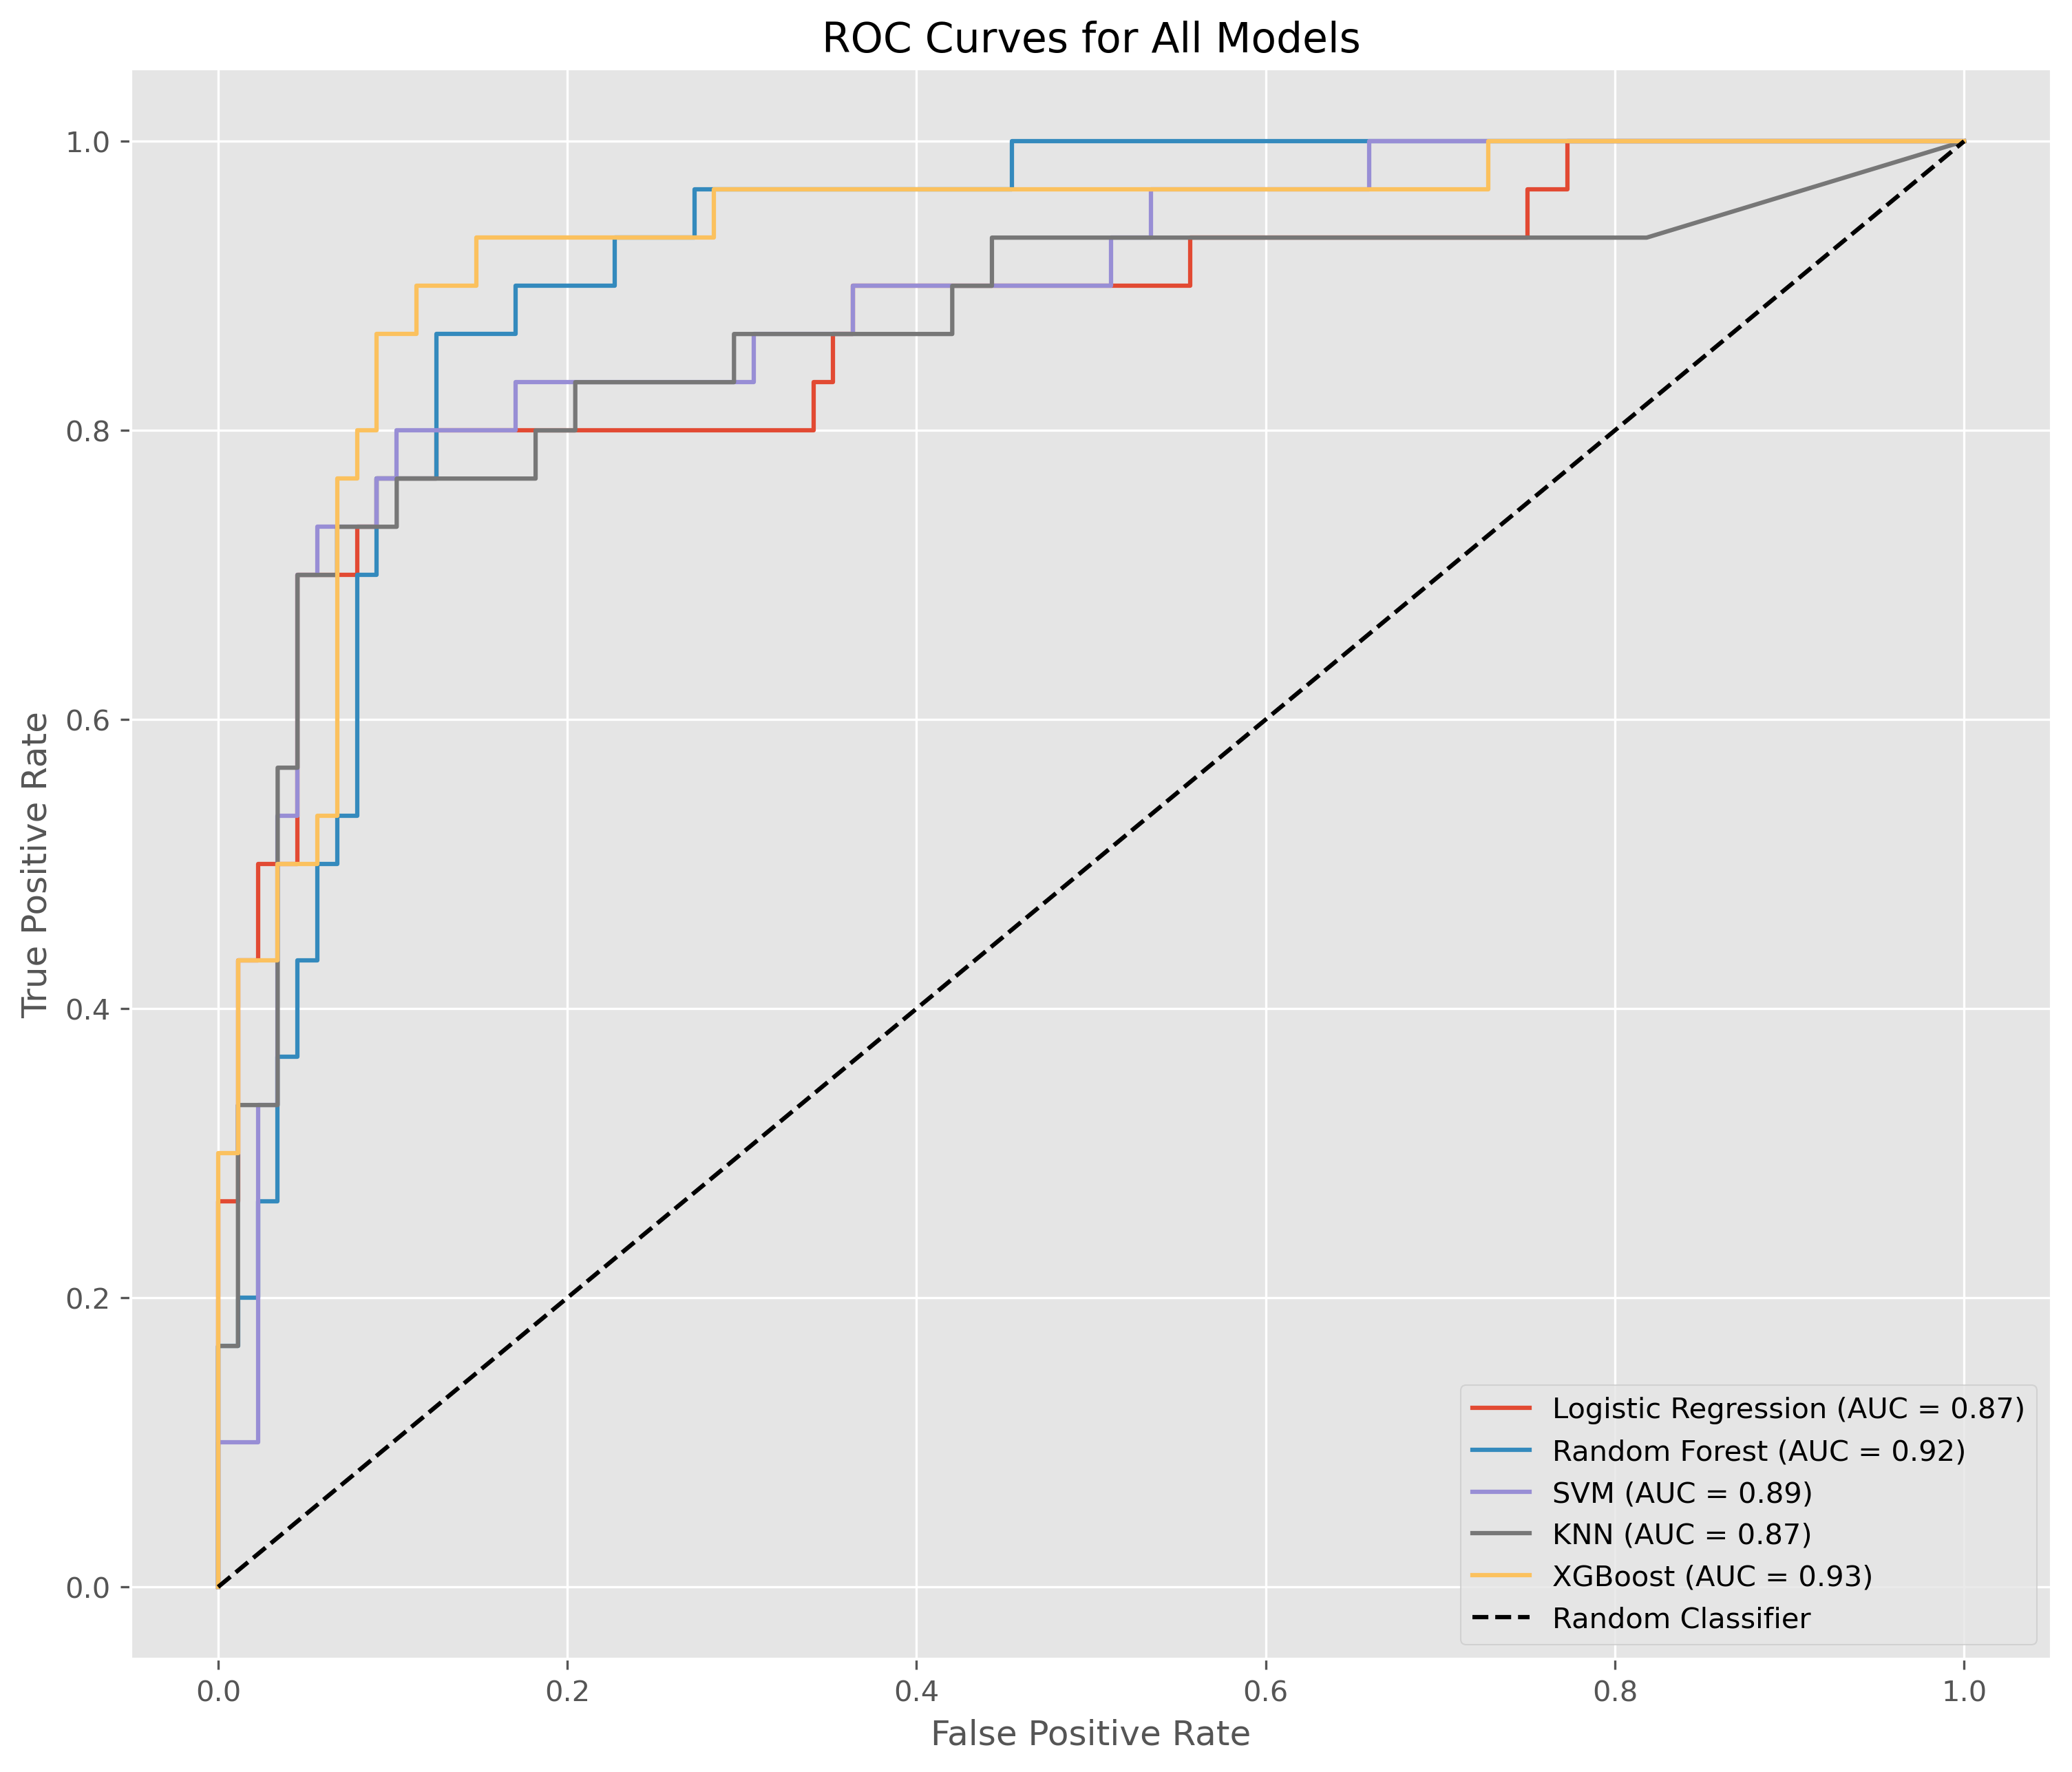

In [160]:
# Refit all models with their respective best hyperparameters and plot ROC curves
plt.figure(figsize=(12, 10))

# Ensure the right resolution
plt.rcParams['figure.dpi'] = 300

# Loop through each model to refit with best parameters and plot ROC curves
for name, model in models.items():
    # Create a pipeline for the current model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    
    # Set the best parameters for the current model
    pipeline.set_params(**best_params[name])
    
    # Fit the model on the training/validation set
    pipeline.fit(X_train_val, y_train_val)
    
    # Predict probabilities on the test set
    y_test_prob = pipeline.predict_proba(X_test)[:, 1]
    
    # Calculate ROC AUC and ROC curve
    roc_auc = roc_auc_score(y_test, y_test_prob)
    fpr, tpr, _ = roc_curve(y_test, y_test_prob)
    
    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Add diagonal line for random classifier
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

# Add labels, title, and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Models')
plt.legend(loc='lower right')

# Show the plot
plt.show()

